In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
dataset = pd.read_csv('data/breast-cancer.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataset.drop(columns= ['id'], axis=1, inplace= True)

In [5]:
dataset.shape

(569, 31)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Data Pre-processing

### Checking and handling missing values

In [7]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### There are no missing values in the dataset

### Checking and handling duplicate values

In [8]:
dataset.duplicated().sum()

np.int64(0)

#### There are no duplicate value in the dataset

### Checking and handling outliers

In [9]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
numerical_features = dataset.select_dtypes(exclude= 'object').columns

In [11]:
numerical_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
new_feature= []
for feature in numerical_features:
    if dataset[feature].mean() >= 1:
        new_feature.append(feature)

In [13]:
new_feature

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'texture_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst']

In [14]:
def checking_outlier(features, dataset):
    plt.figure(figsize=(25, 22))
    for i in range(len(features)):
        plt.subplot(4, 3, i+1)
        sns.boxplot(x= features[i], data= dataset)
    plt.show()

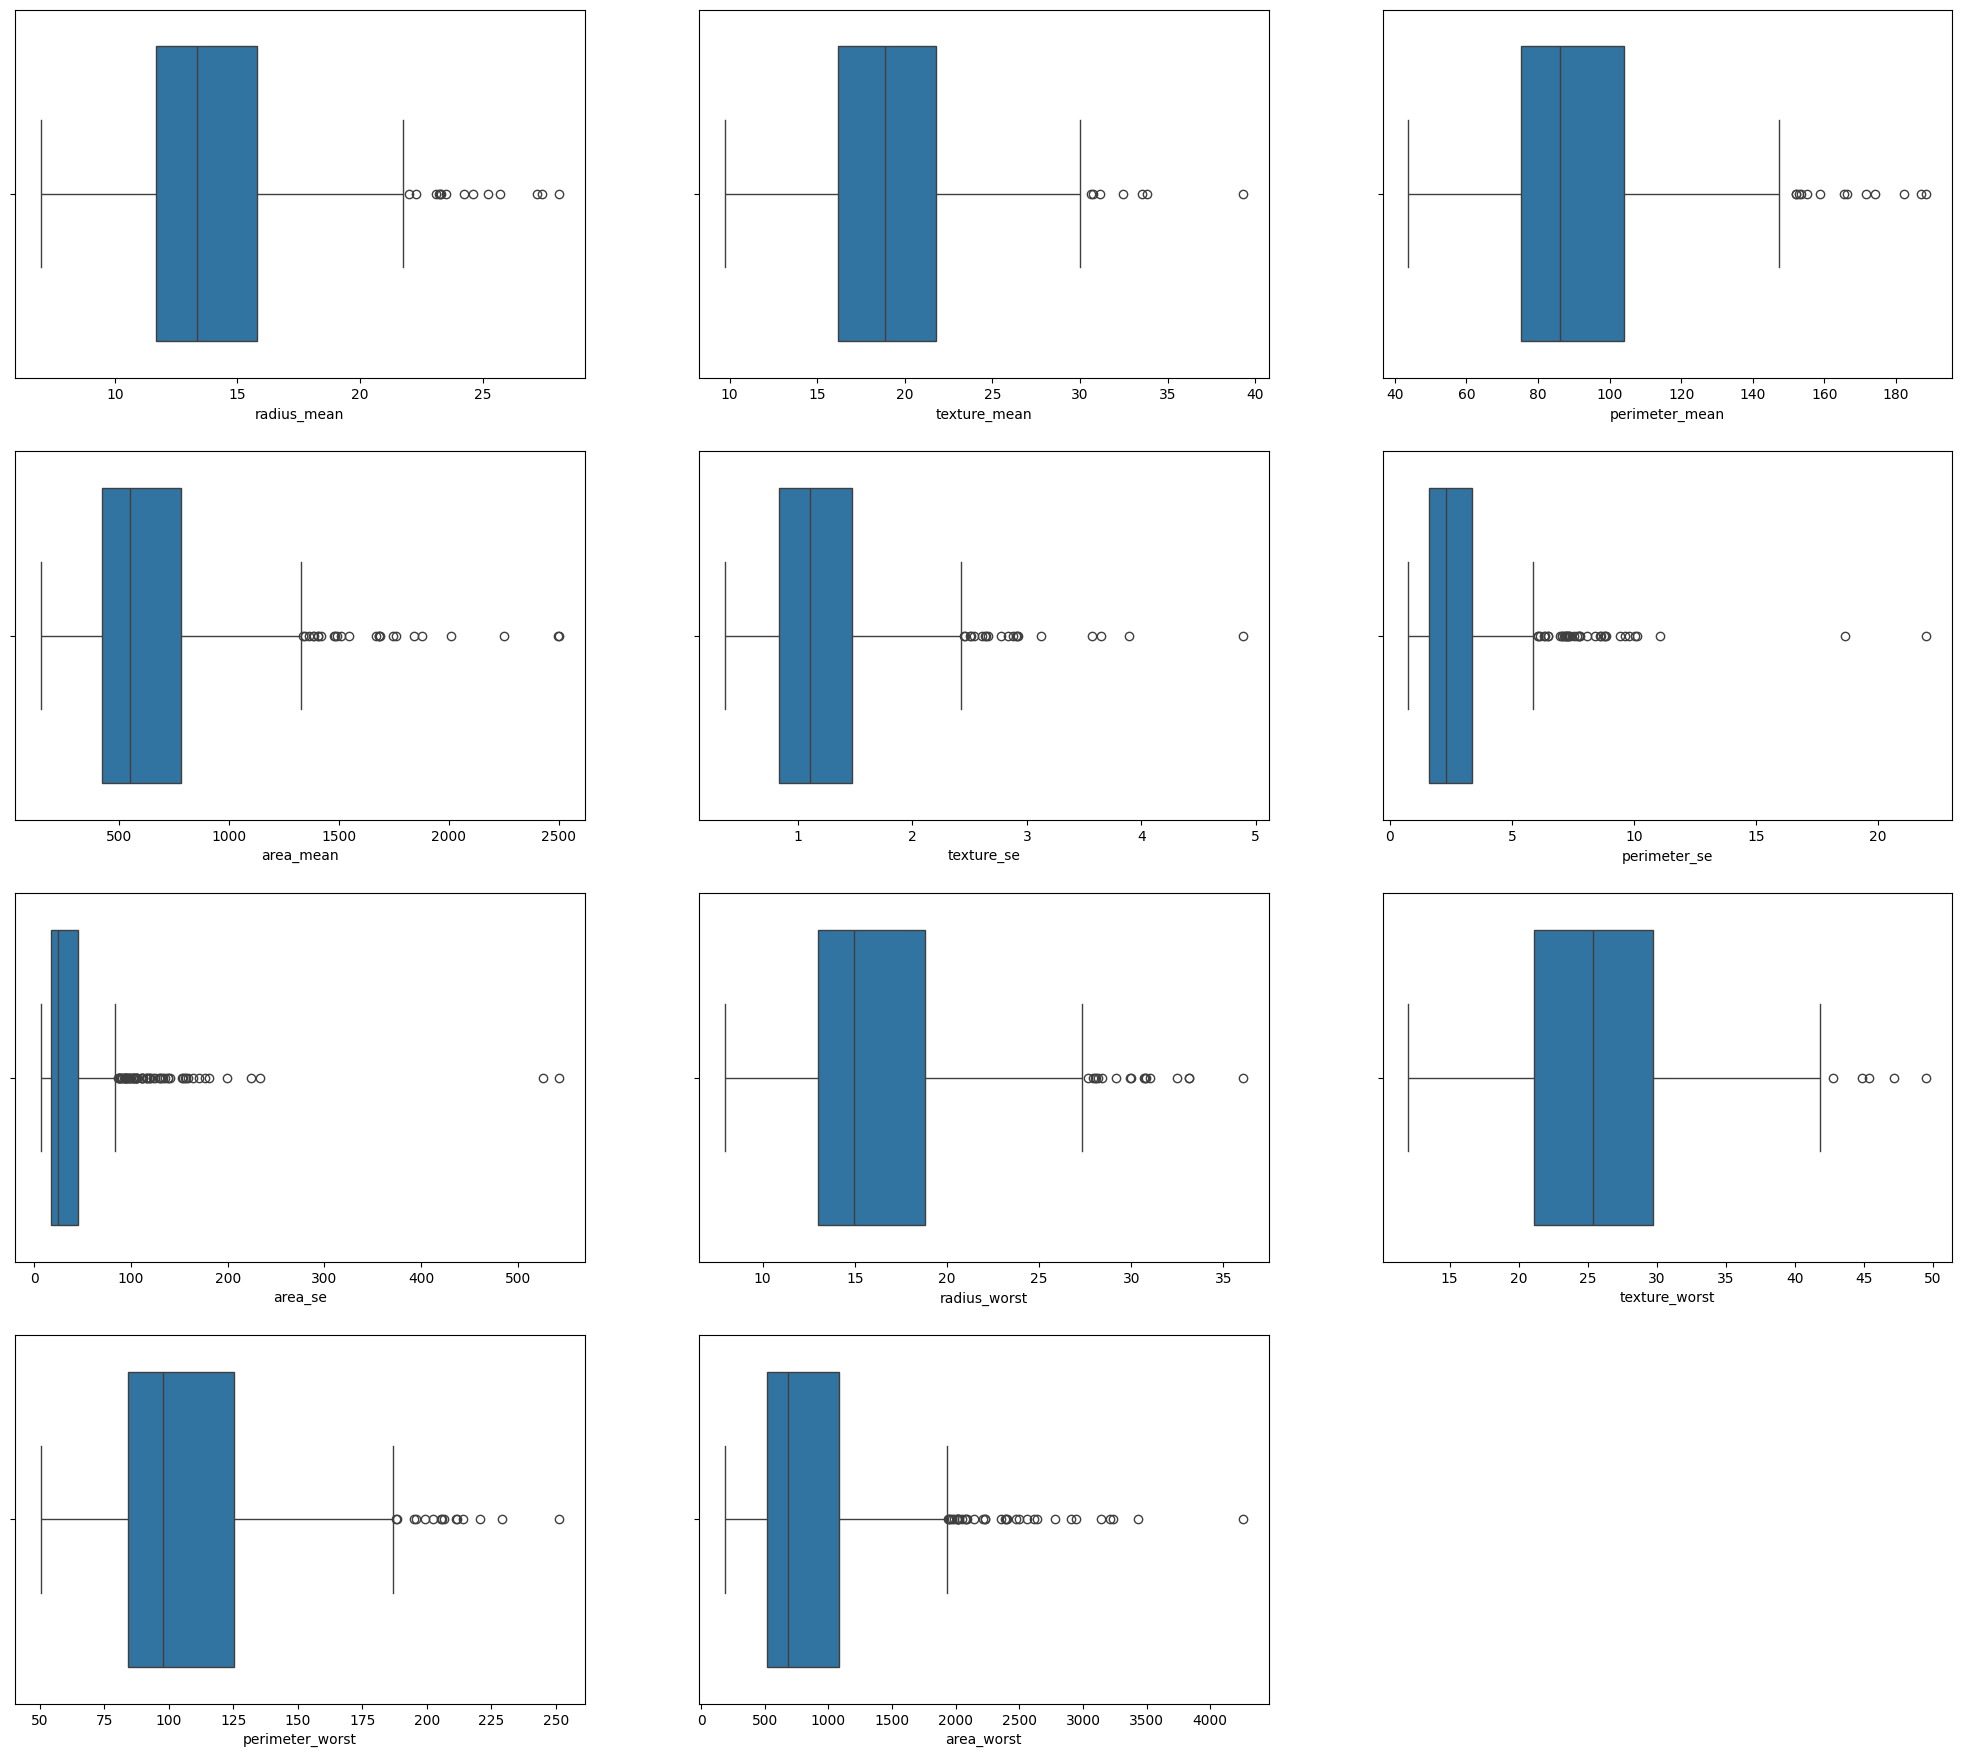

In [15]:
checking_outlier(new_feature, dataset)

In [16]:
def handling_outlier(features, dataset):
    for feature in features:
        Q1 = dataset[feature].quantile(0.25)
        Q3 = dataset[feature].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        dataset[feature] = dataset[feature].clip(lower, upper)

In [17]:
handling_outlier(new_feature, dataset)

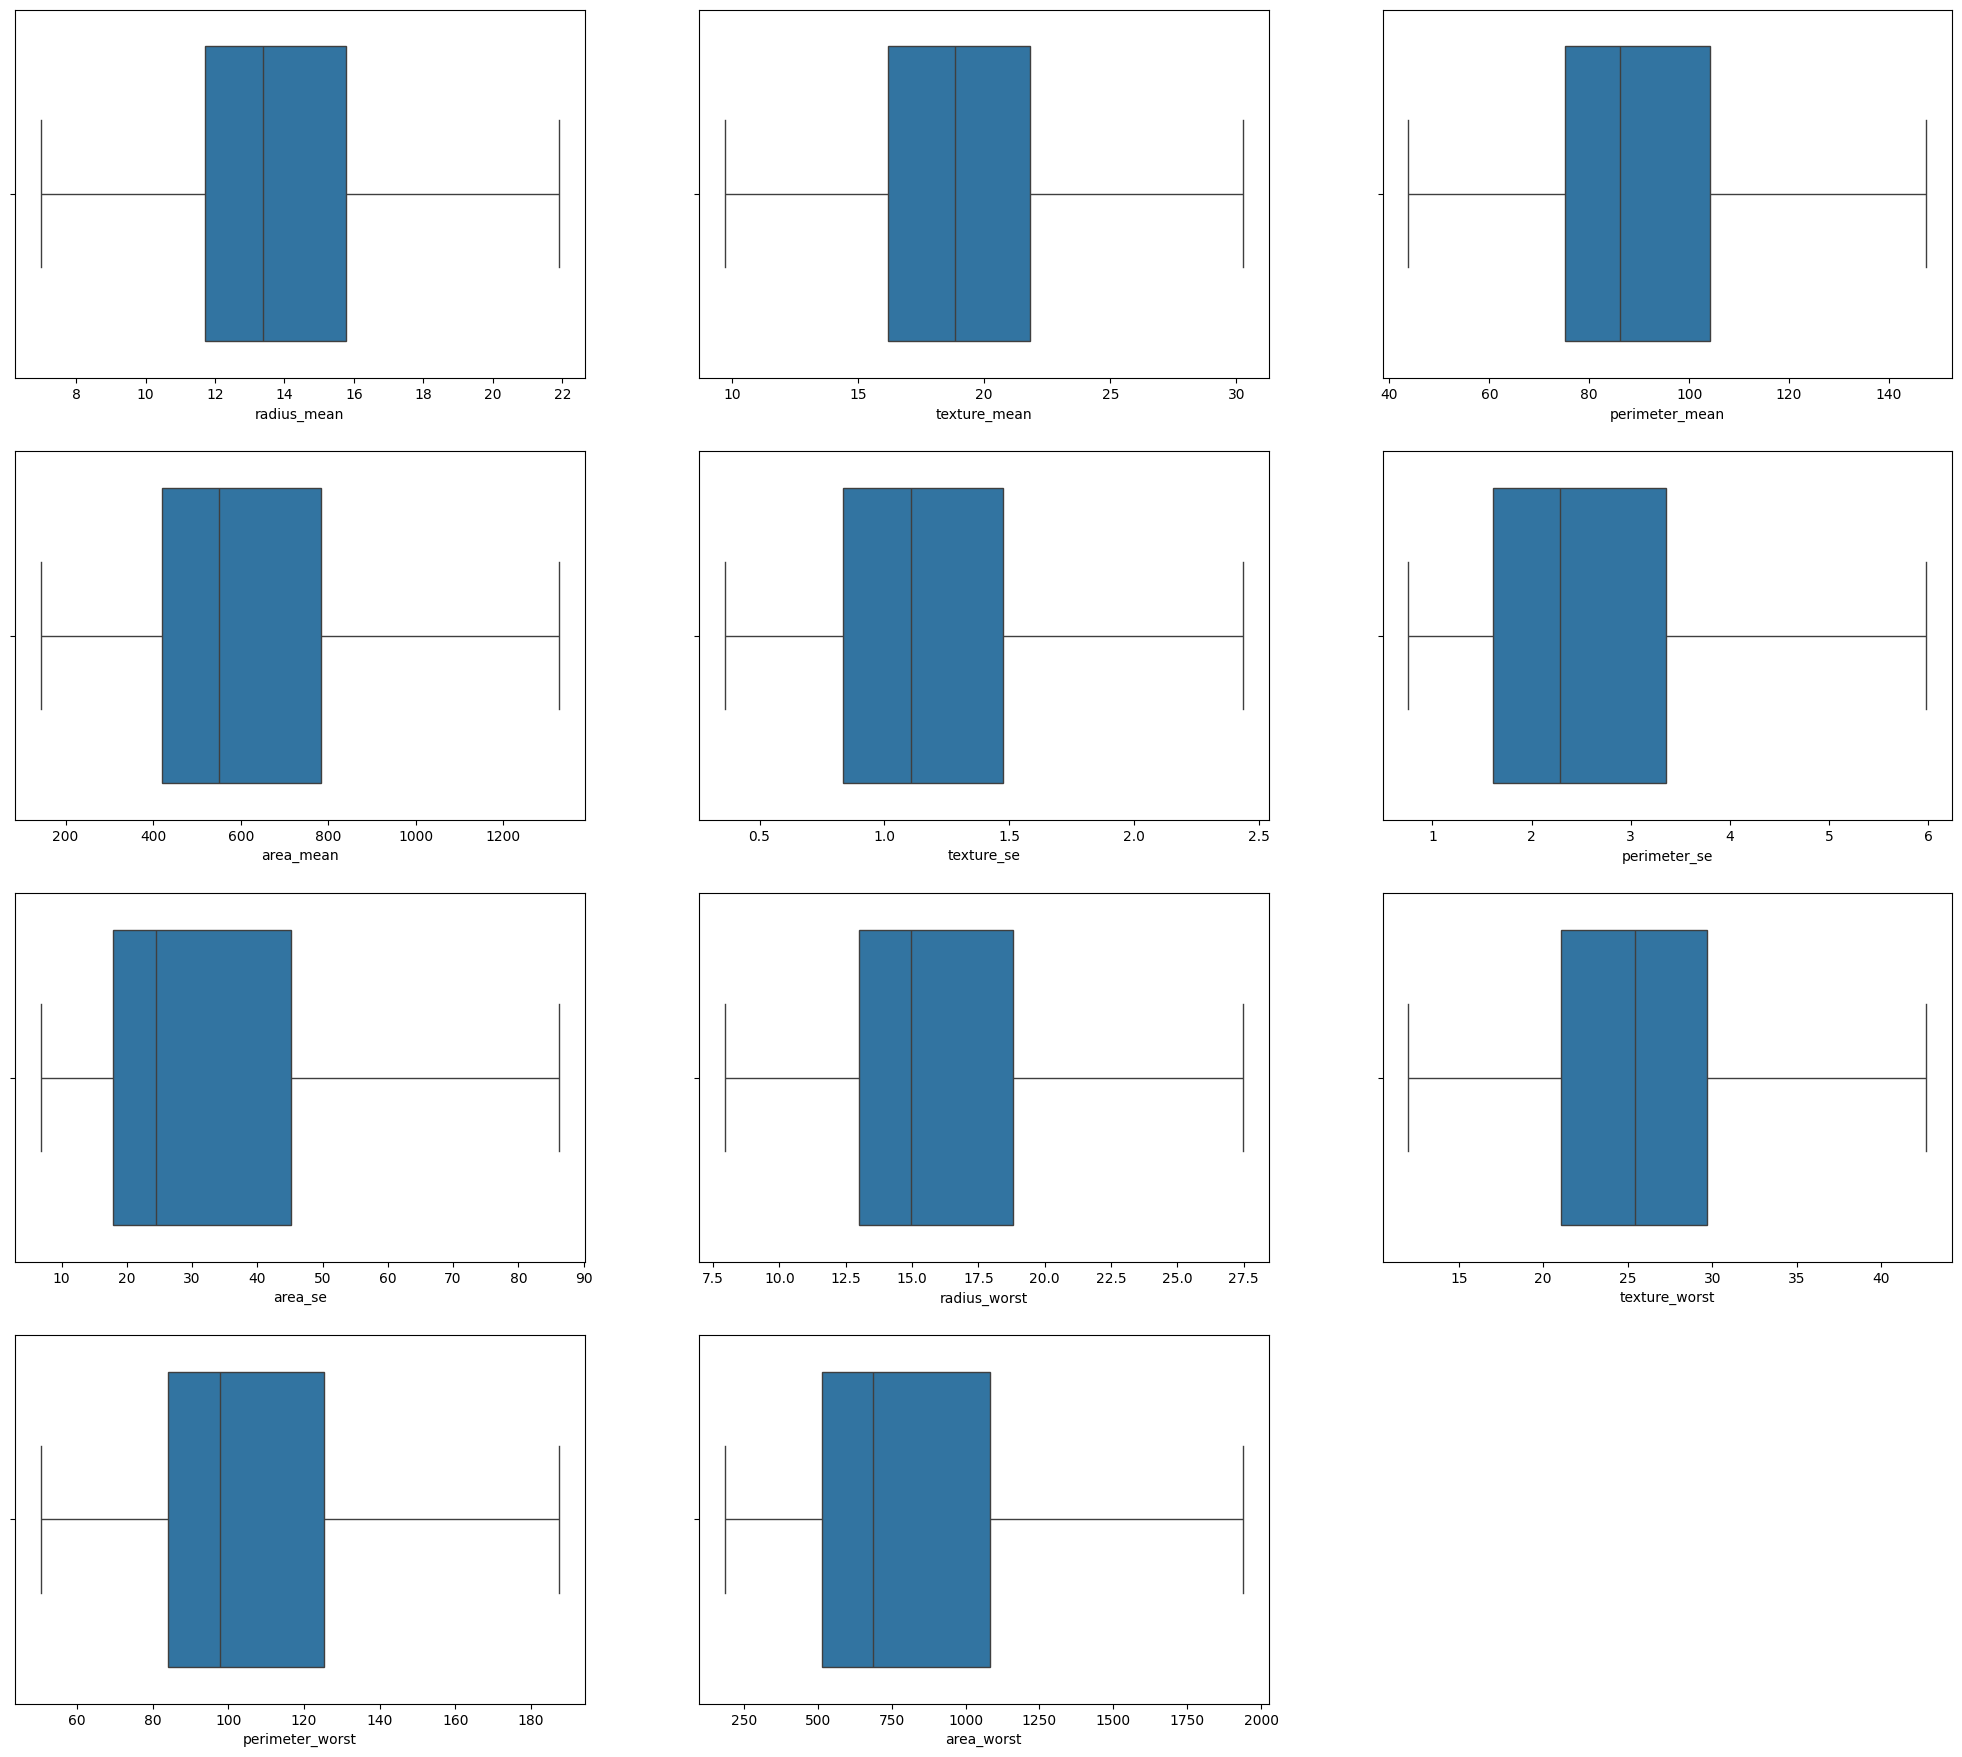

In [18]:
checking_outlier(new_feature, dataset)

In [19]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.062916,19.254736,91.543787,639.765202,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.183882,25.648453,106.705369,849.907821,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.340025,4.187510,23.047218,305.343508,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.587249,6.054406,31.957777,475.645240,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,21.900000,30.245000,147.495000,1326.300000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,27.460000,42.680000,187.335000,1937.050000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Outlier are removed from the dataset

### Encoding Categorical feature

In [20]:
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis'>

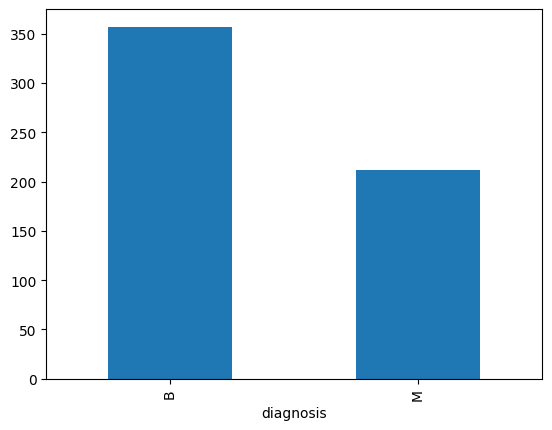

In [21]:
dataset['diagnosis'].value_counts().plot(kind= 'bar')

In [22]:
mapping = {"M" : 1, "B" : 0}

dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x:mapping[x])

In [23]:
dataset['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## EDA

### Visualize numerical features

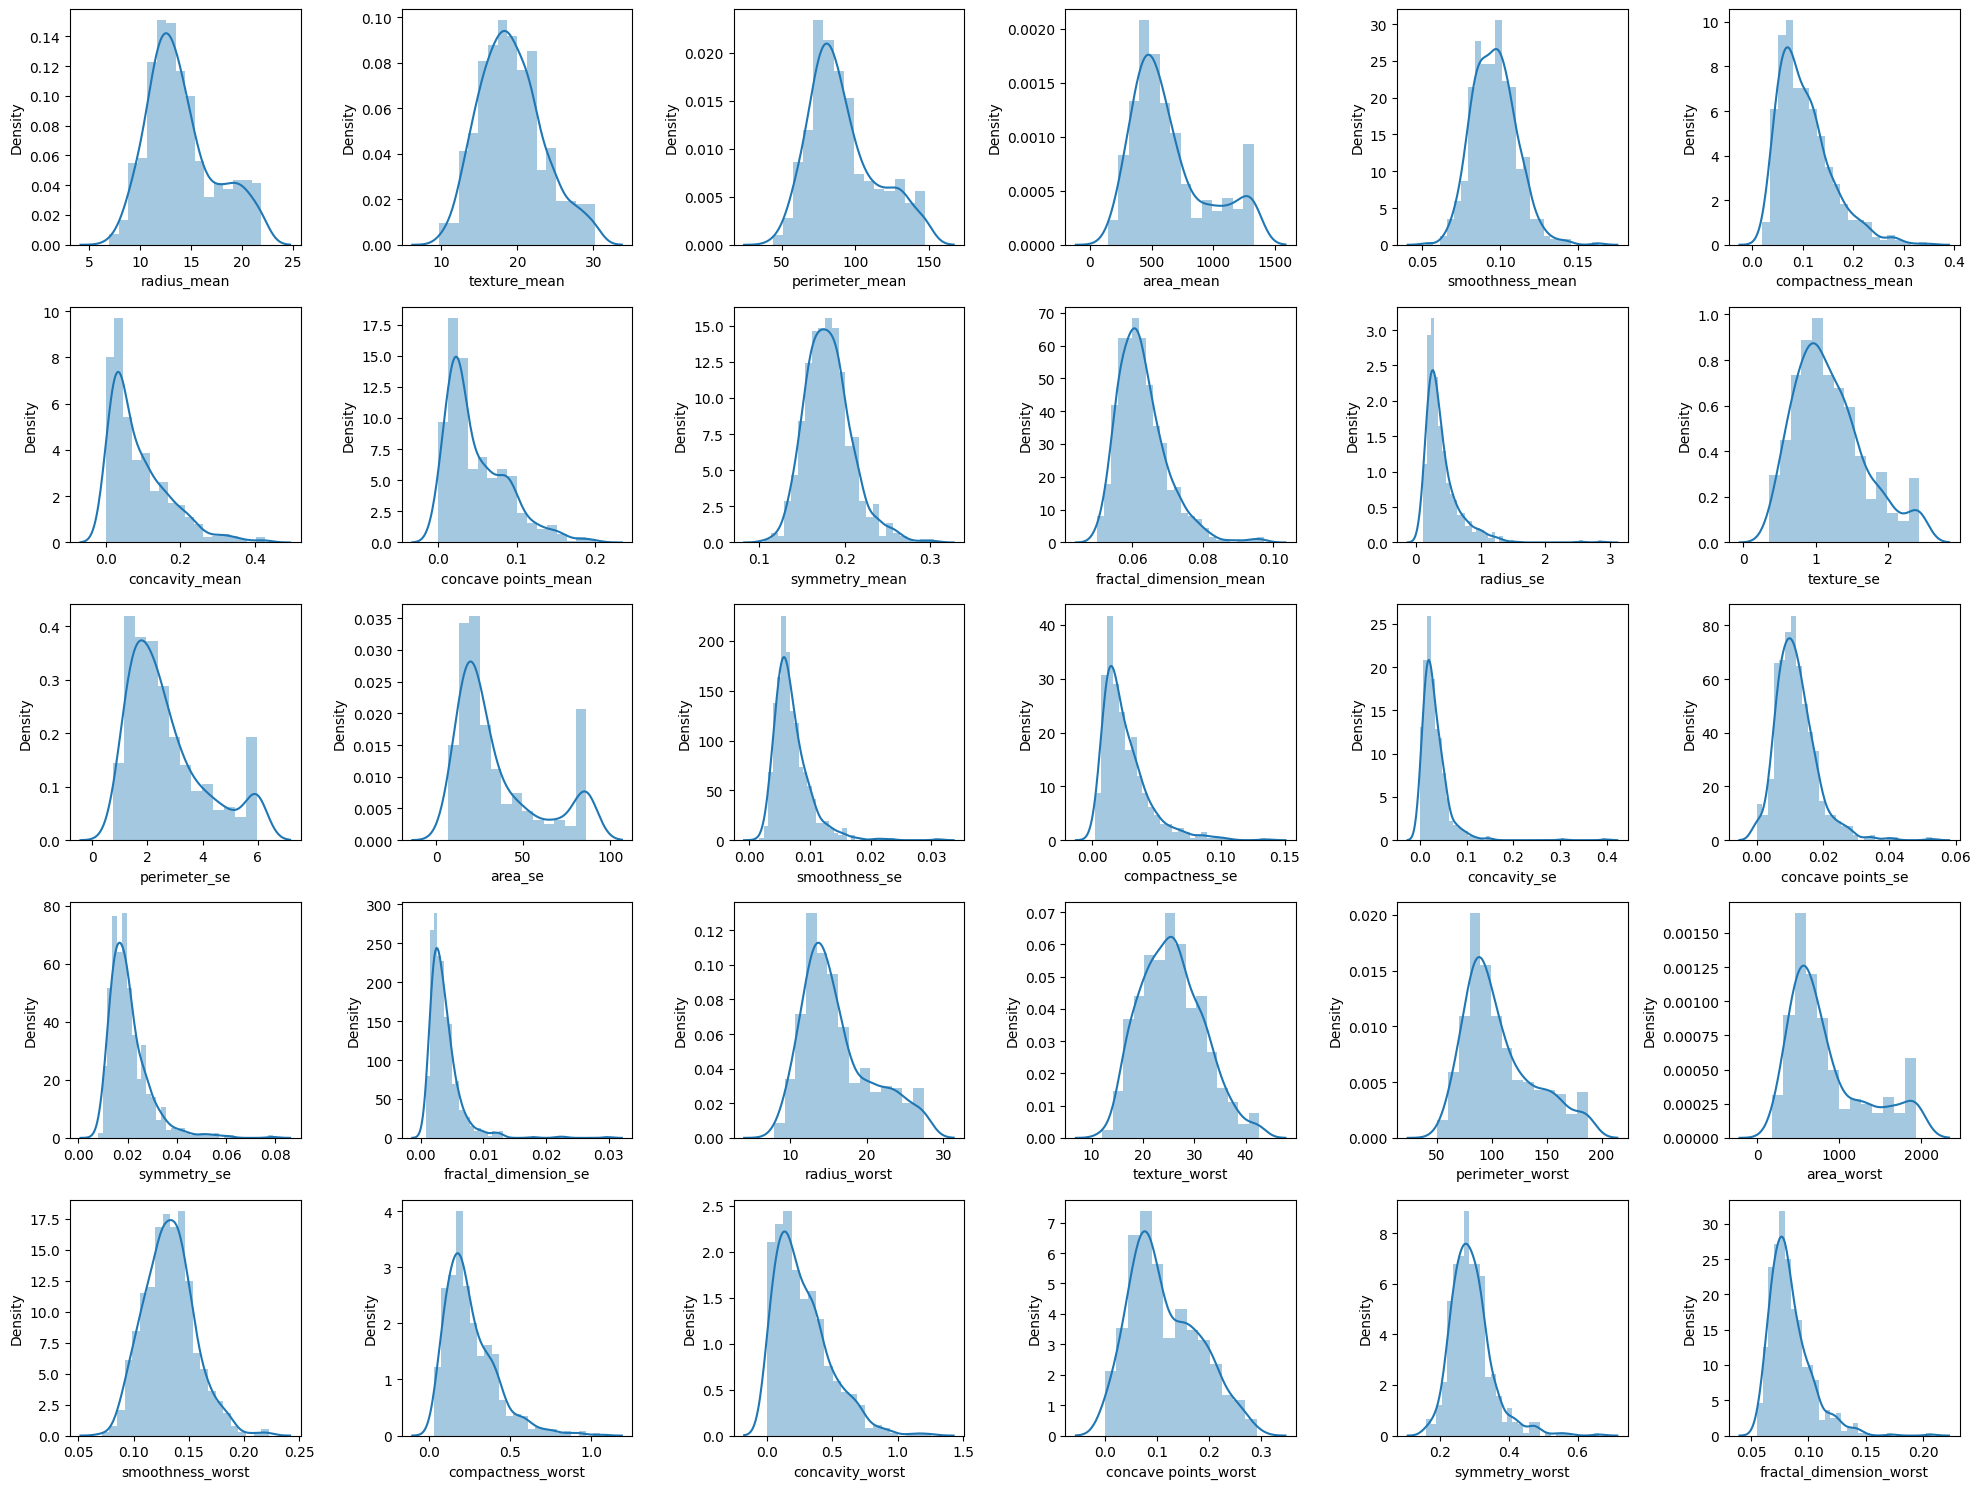

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_features:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Correlation matrix

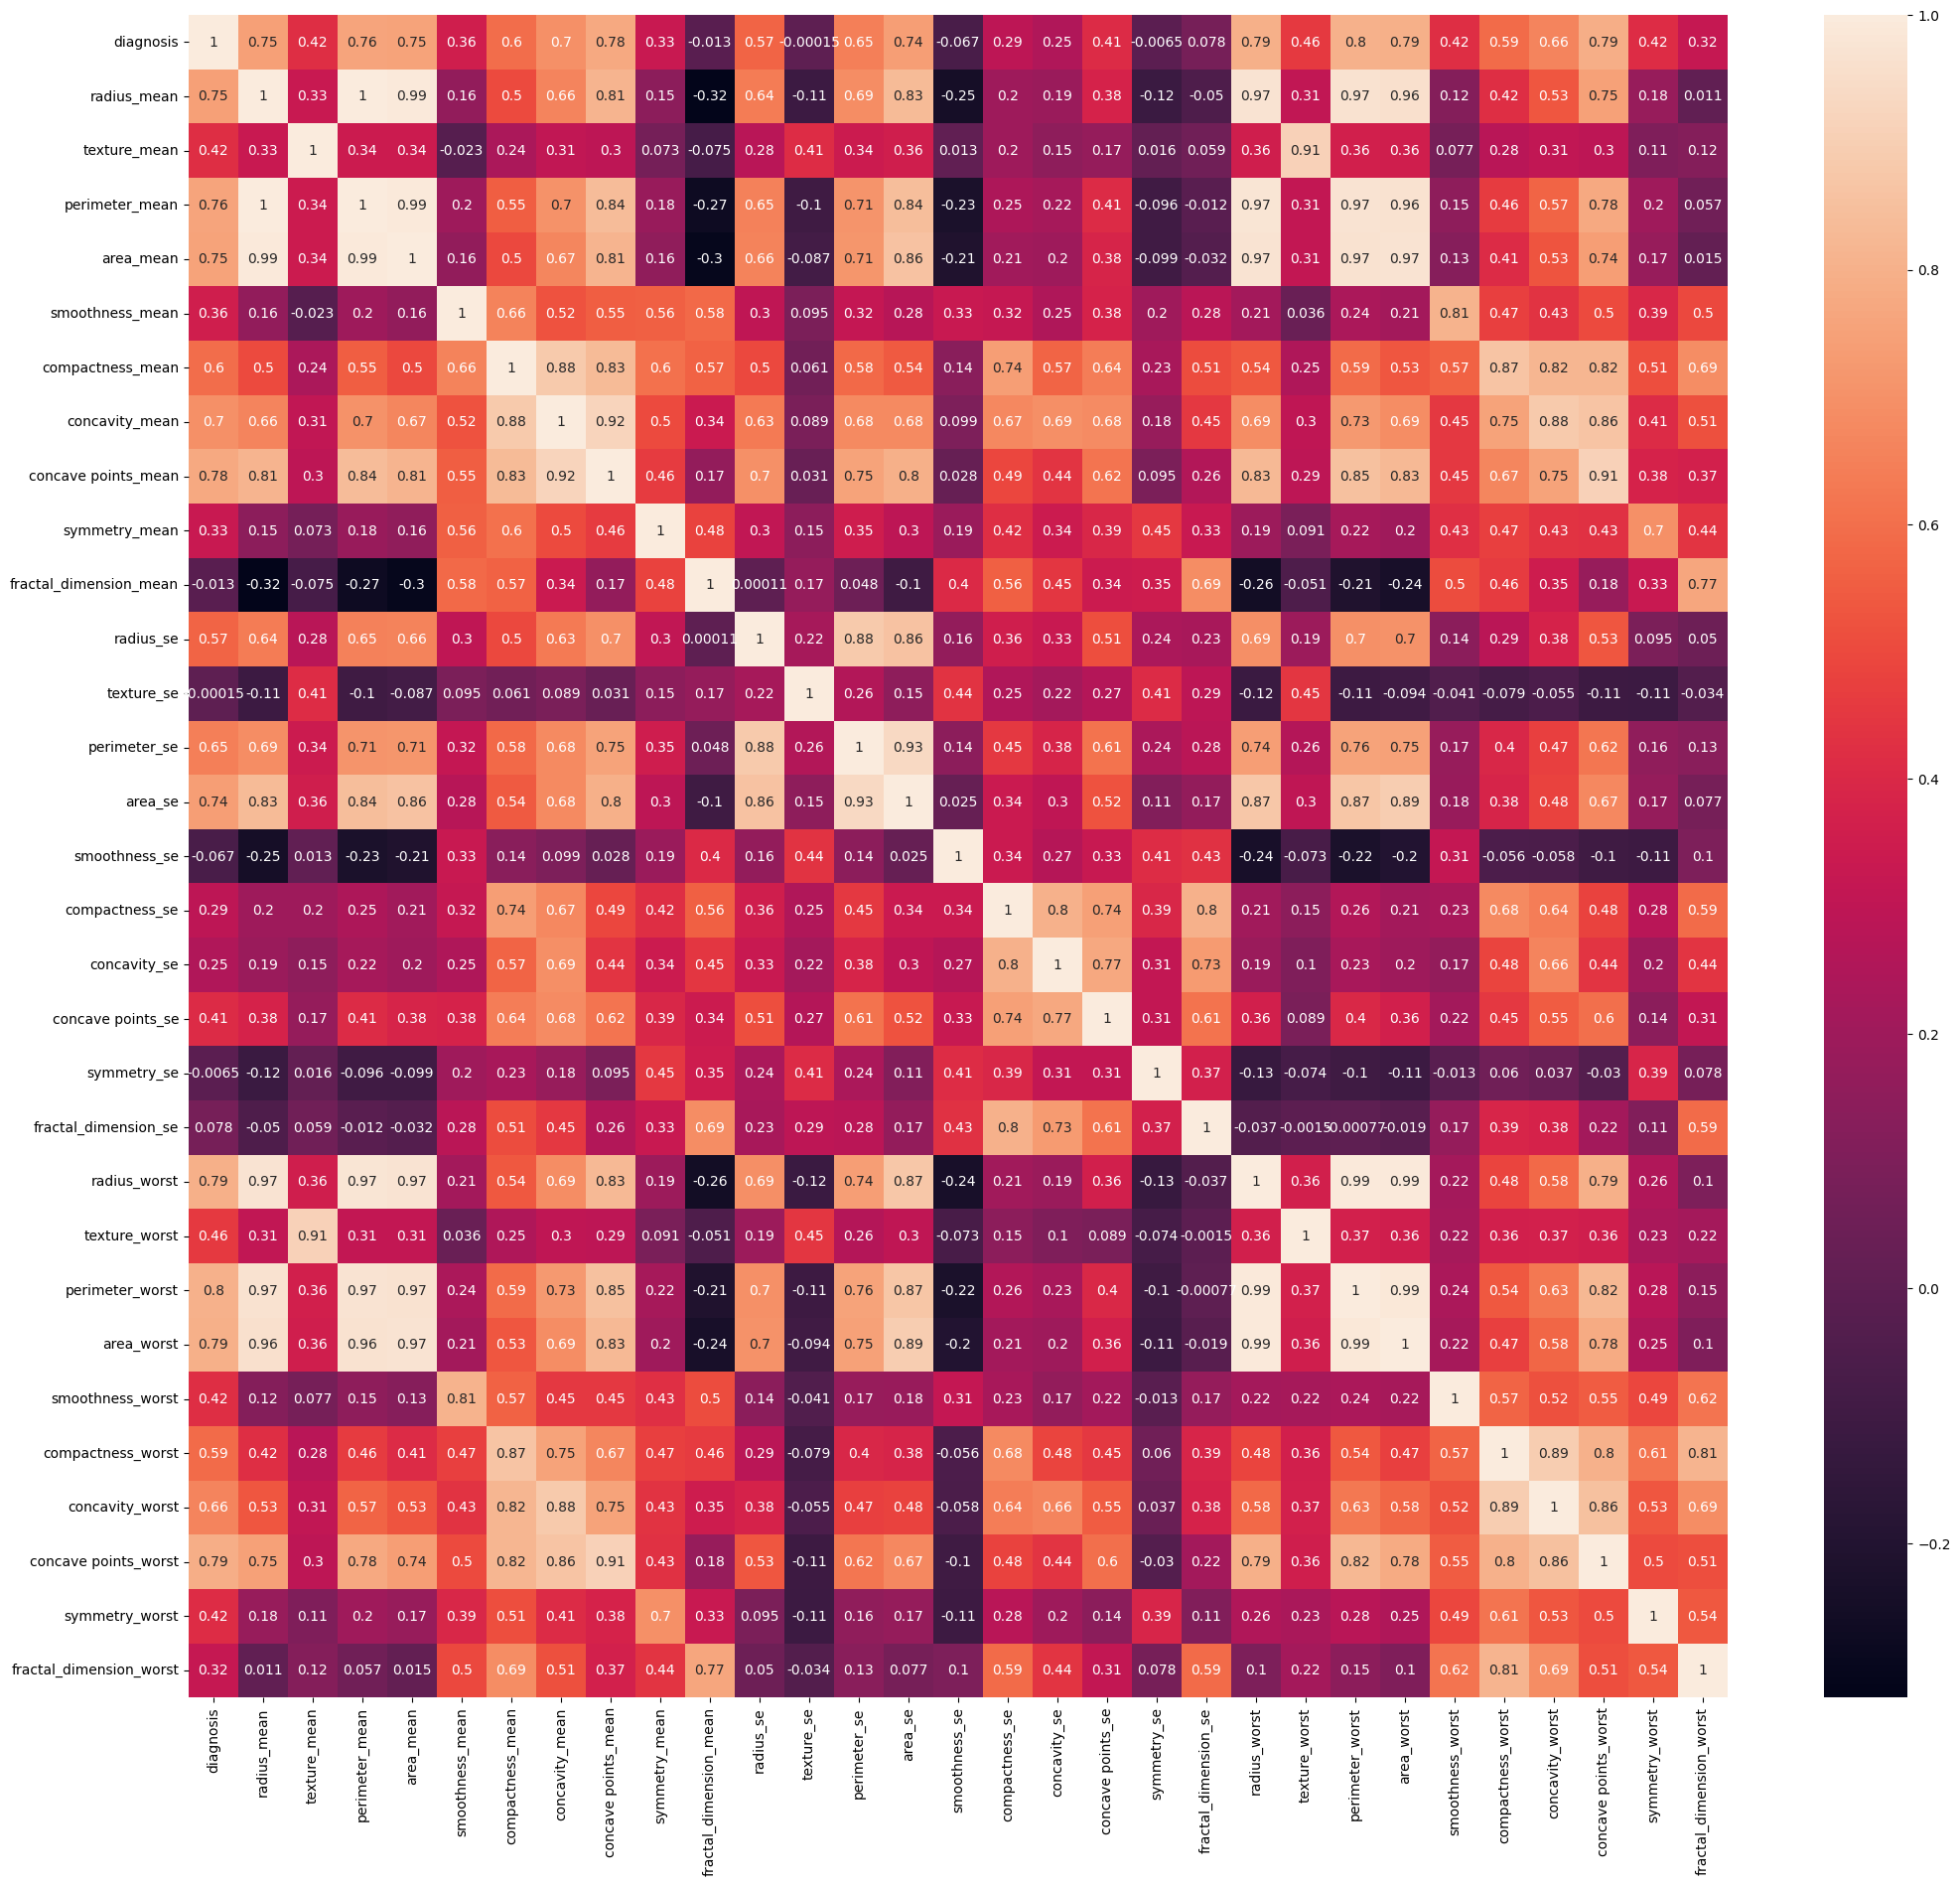

In [25]:
plt.figure(figsize= (25,22))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

#### Removing multi-collinearity from the dataset

In [26]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [27]:
correlated_features = correlation(dataset, 0.90)

In [28]:
correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [29]:
dataset.drop(columns=['area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'], axis= 1, inplace=True)

In [30]:
dataset.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [31]:
dataset.shape

(569, 22)

## Train-Test Split and Scaling

In [32]:
X = dataset.drop(columns=['diagnosis'], axis=1)
y = dataset['diagnosis']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 21)
(455,)
(114, 21)
(114,)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [36]:
models = []
accuracies = []

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
y_train_lr = lr_model.predict(X_train_scaled)
y_test_lr = lr_model.predict(X_test_scaled)

lr_train_accuracy = accuracy_score(y_train, y_train_lr)
lr_test_accuracy = accuracy_score(y_test, y_test_lr)

models.append("Logistic Regression")
accuracies.append(lr_test_accuracy)

print(f'Model training score : {lr_train_accuracy}%')
print(f'Model testing score : {lr_test_accuracy}%')

Model training score : 0.9846153846153847%
Model testing score : 0.9824561403508771%


In [40]:
print(classification_report(y_test, y_test_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



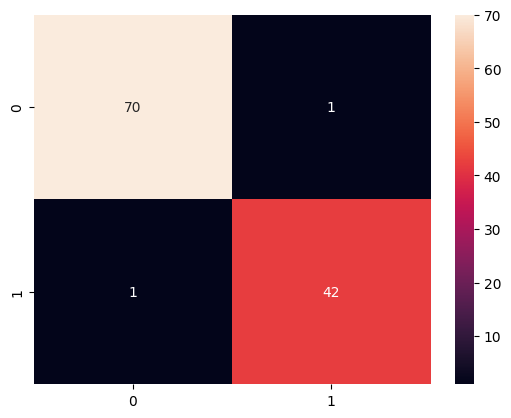

In [41]:
clf_lr = confusion_matrix(y_test, y_test_lr)
sns.heatmap(clf_lr, annot=True)
plt.show()

### SVM

In [42]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [43]:
y_train_svm = svm_model.predict(X_train_scaled)
y_test_svm = svm_model.predict(X_test_scaled)

svm_train_accuracy = accuracy_score(y_train, y_train_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_svm)

models.append("SVM")
accuracies.append(svm_test_accuracy)

print(f'Model training score : {svm_train_accuracy}%')
print(f'Model testing score : {svm_test_accuracy}%')

Model training score : 0.9846153846153847%
Model testing score : 0.956140350877193%


In [44]:
print(classification_report(y_test, y_test_svm))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



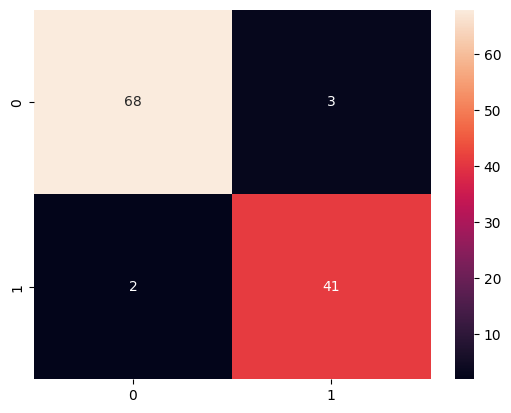

In [45]:
clf_svm = confusion_matrix(y_test, y_test_svm)
sns.heatmap(clf_svm, annot=True)
plt.show()

### Decsion Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [47]:
y_train_dt = dt_model.predict(X_train_scaled)
y_test_dt = dt_model.predict(X_test_scaled)

dt_train_accuracy = accuracy_score(y_train, y_train_dt)
dt_test_accuracy = accuracy_score(y_test, y_test_dt)

models.append("Decision Tree")
accuracies.append(dt_test_accuracy)

print(f'Model training score : {dt_train_accuracy}%')
print(f'Model testing score : {dt_test_accuracy}%')

Model training score : 1.0%
Model testing score : 0.9122807017543859%


In [48]:
print(classification_report(y_test, y_test_dt))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



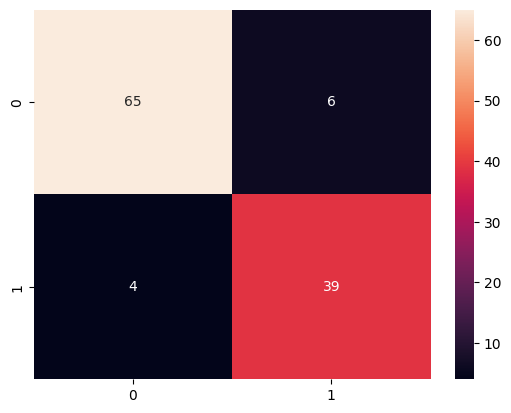

In [49]:
clf_dt = confusion_matrix(y_test, y_test_dt)
sns.heatmap(clf_dt, annot=True)
plt.show()

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [51]:
y_train_rf = rf_model.predict(X_train_scaled)
y_test_rf = rf_model.predict(X_test_scaled)

rf_train_accuracy = accuracy_score(y_train, y_train_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_rf)

models.append("Random Forest")
accuracies.append(rf_test_accuracy)

print(f'Model training score : {rf_train_accuracy}%')
print(f'Model testing score : {rf_test_accuracy}%')

Model training score : 1.0%
Model testing score : 0.9649122807017544%


In [52]:
print(classification_report(y_test, y_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



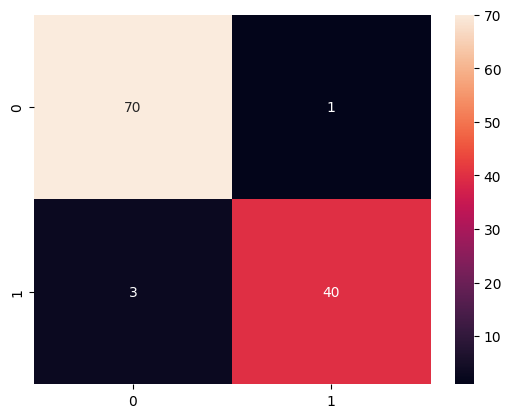

In [53]:
clf_rf = confusion_matrix(y_test, y_test_rf)
sns.heatmap(clf_rf, annot=True)
plt.show()

### Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [55]:
y_train_gb = gb_model.predict(X_train_scaled)
y_test_gb = gb_model.predict(X_test_scaled)

gb_train_accuracy = accuracy_score(y_train, y_train_gb)
gb_test_accuracy = accuracy_score(y_test, y_test_gb)

models.append("Gradient Boosting")
accuracies.append(gb_test_accuracy)

print(f'Model training score : {gb_train_accuracy}%')
print(f'Model testing score : {gb_test_accuracy}%')

Model training score : 1.0%
Model testing score : 0.956140350877193%


In [56]:
print(classification_report(y_test, y_test_gb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



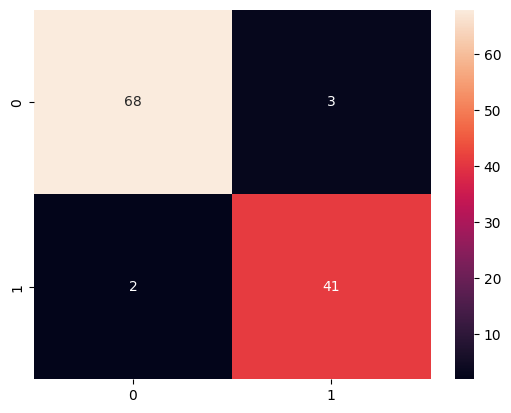

In [57]:
clf_gb = confusion_matrix(y_test, y_test_gb)
sns.heatmap(clf_gb, annot=True)
plt.show()

### XGBoost

In [58]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
y_train_xgb = xgb_model.predict(X_train_scaled)
y_test_xgb = xgb_model.predict(X_test_scaled)

xgb_train_accuracy = accuracy_score(y_train, y_train_xgb)
xgb_test_accuracy = accuracy_score(y_test, y_test_xgb)

models.append("XGBoost")
accuracies.append(xgb_test_accuracy)

print(f'Model training score : {xgb_train_accuracy}%')
print(f'Model testing score : {xgb_test_accuracy}%')

Model training score : 1.0%
Model testing score : 0.9824561403508771%


In [60]:
print(classification_report(y_test, y_test_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



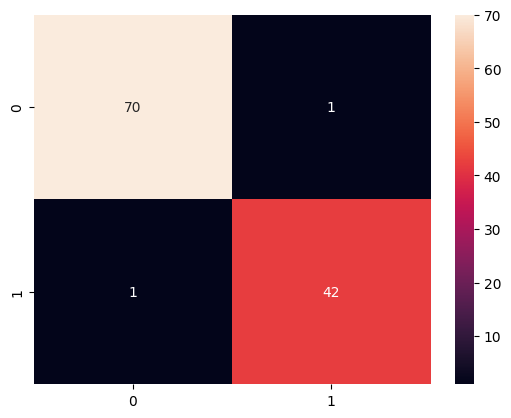

In [61]:
clf_xgb = confusion_matrix(y_test, y_test_xgb)
sns.heatmap(clf_xgb, annot=True)
plt.show()

### Model Selection

In [62]:
models

['Logistic Regression',
 'SVM',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'XGBoost']

In [63]:
accuracies

[0.9824561403508771,
 0.956140350877193,
 0.9122807017543859,
 0.9649122807017544,
 0.956140350877193,
 0.9824561403508771]

In [64]:
result = pd.DataFrame({"Model Name": models, "Accuracy Score" : accuracies})
result.sort_values(by="Accuracy Score", ascending= False)

,Model Name,Accuracy Score
0,Logistic Regression,0.982456
5,XGBoost,0.982456
3,Random Forest,0.964912
1,SVM,0.956140
4,Gradient Boosting,0.956140
2,Decision Tree,0.912281
